This dataset (https://www.kaggle.com/santoshd3/bank-customers) contain some customers who are withdrawing their account from the bank due to certain issues. Hence, by analysing this set of data, we hope to be able to achieve certain objectives.

1) Fit the observervations through a model and understand the factors that may influence the customer churn. (via supervised learning)

2) Determine the target audience that are more likely to churn. (via unsupervised learning)

This is the list of libraries used for the analysis of this dataset

In [ ]:
# Packages for clustering
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing, model_selection, metrics, tree, ensemble
from sklearn.metrics import silhouette_score, silhouette_samples, make_scorer, classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
!pip install yellowbrick
from yellowbrick.cluster import InterclusterDistance, KElbowVisualizer

# Sweetviz
!pip install sweetviz
import sweetviz as sv

# Classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

# SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter


# **Supervised learning**

In [ ]:
# Reading the dataset into Python
url = 'https://raw.githubusercontent.com/tongzxc/Techforshe-Customer-Analytics/master/ChurnForBankCustomers.csv'
churn = pd.read_csv(url)

In [ ]:
# To get a brief idea of the dataset given
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Format and clean data





In [ ]:
# Renaming column 'Exited' to 'Churned'
churn = churn.rename({'Exited':'Churned'}, axis=1)

In [ ]:
# Understanding data type in the dataset
churn.info()
churn.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Churned          10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


(10000, 14)

The data type looks expected to each variable, thus we will move on to dropping some variables which are not necessary for the analysis.

In [ ]:
# Drop 'RowNumber', 'CustomerId', 'Surname'
churn = churn.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [ ]:
# Exploring the data input into each variables
for n in range(0,len(churn.columns)):
  var = churn.columns[n]
  entries = list(set(churn[var]))
  uniqueValues= len(entries)
  print(f'The variable {var} contains {uniqueValues} unique entries, and they are {entries}')

The variable CreditScore contains 460 unique entries, and they are [350, 351, 358, 359, 363, 365, 367, 373, 376, 382, 383, 386, 395, 399, 401, 404, 405, 407, 408, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 57

### Feature Engineering


To create bins for certain variables to change them to categorical variables.

In [ ]:
# Tenure, Age, NumOfProducts

# Tenure
bins_tenure = [ -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
labels_tenure = ['New', '1 yrs', '2 yrs', '3 yrs', '4 yrs', '5 yrs', '6 yrs', '7 yrs', '8 yrs', '9 yrs', '10 yrs']

churn['tenure_yrs'] = pd.cut(churn['Tenure'], bins = bins_tenure, labels = labels_tenure) #bin values into discrete intervals

# Age
bins_age = [ 17, 30, 40, 50, 60, 70, 80, 90, 100]
labels_age = ['18-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

churn['age_groups'] = pd.cut(churn['Age'], bins = bins_age, labels = labels_age)

#NumOfProducts
bins_products = [ 0, 1, 2, 3, 4]
labels_products = ['1 product', '2 products', '3 products', '4 products']

churn['NumOfProducts_label'] = pd.cut(churn['NumOfProducts'], bins = bins_products, labels = labels_products)

churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   CreditScore          10000 non-null  int64   
 1   Geography            10000 non-null  object  
 2   Gender               10000 non-null  object  
 3   Age                  10000 non-null  int64   
 4   Tenure               10000 non-null  int64   
 5   Balance              10000 non-null  float64 
 6   NumOfProducts        10000 non-null  int64   
 7   HasCrCard            10000 non-null  int64   
 8   IsActiveMember       10000 non-null  int64   
 9   EstimatedSalary      10000 non-null  float64 
 10  Churned              10000 non-null  int64   
 11  tenure_yrs           10000 non-null  category
 12  age_groups           10000 non-null  category
 13  NumOfProducts_label  10000 non-null  category
dtypes: category(3), float64(2), int64(7), object(2)
memory usage: 889.8+ KB

In [ ]:
# Encoding categorical data
colsToEncode = churn.select_dtypes(include = ['category', 'object']).columns #select categorical data type

churn_encoded = pd.get_dummies(churn, columns = colsToEncode)

churn_encoded.drop(['Age','Tenure','NumOfProducts'], axis = 1, inplace = True)

churn_encoded

,CreditScore,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,tenure_yrs_New,tenure_yrs_1 yrs,tenure_yrs_2 yrs,tenure_yrs_3 yrs,tenure_yrs_4 yrs,tenure_yrs_5 yrs,tenure_yrs_6 yrs,tenure_yrs_7 yrs,tenure_yrs_8 yrs,tenure_yrs_9 yrs,tenure_yrs_10 yrs,age_groups_18-30,age_groups_31-40,age_groups_41-50,age_groups_51-60,age_groups_61-70,age_groups_71-80,age_groups_81-90,age_groups_91-100,NumOfProducts_label_1 product,NumOfProducts_label_2 products,NumOfProducts_label_3 products,NumOfProducts_label_4 products
0,619,0.00,1,1,101348.88,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,608,83807.86,0,1,112542.58,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,502,159660.80,1,0,113931.57,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,699,0.00,0,0,93826.63,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,850,125510.82,1,1,79084.10,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0.00,1,0,96270.64,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
9996,516,57369.61,1,1,101699.77,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0
9997,709,0.00,0,1,42085.58,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
9998,772,75075.31,1,0,92888.52,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


### Exploratory data analysis

In [ ]:
churn_report = sv.analyze(churn_encoded)
churn_report.show_html()

:FEATURES DONE:                    |█████████████████████| [100%]   00:08  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:07  -> (00:00 left)


Creating Associations graph... DONE!
Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


### Correlation Matrix

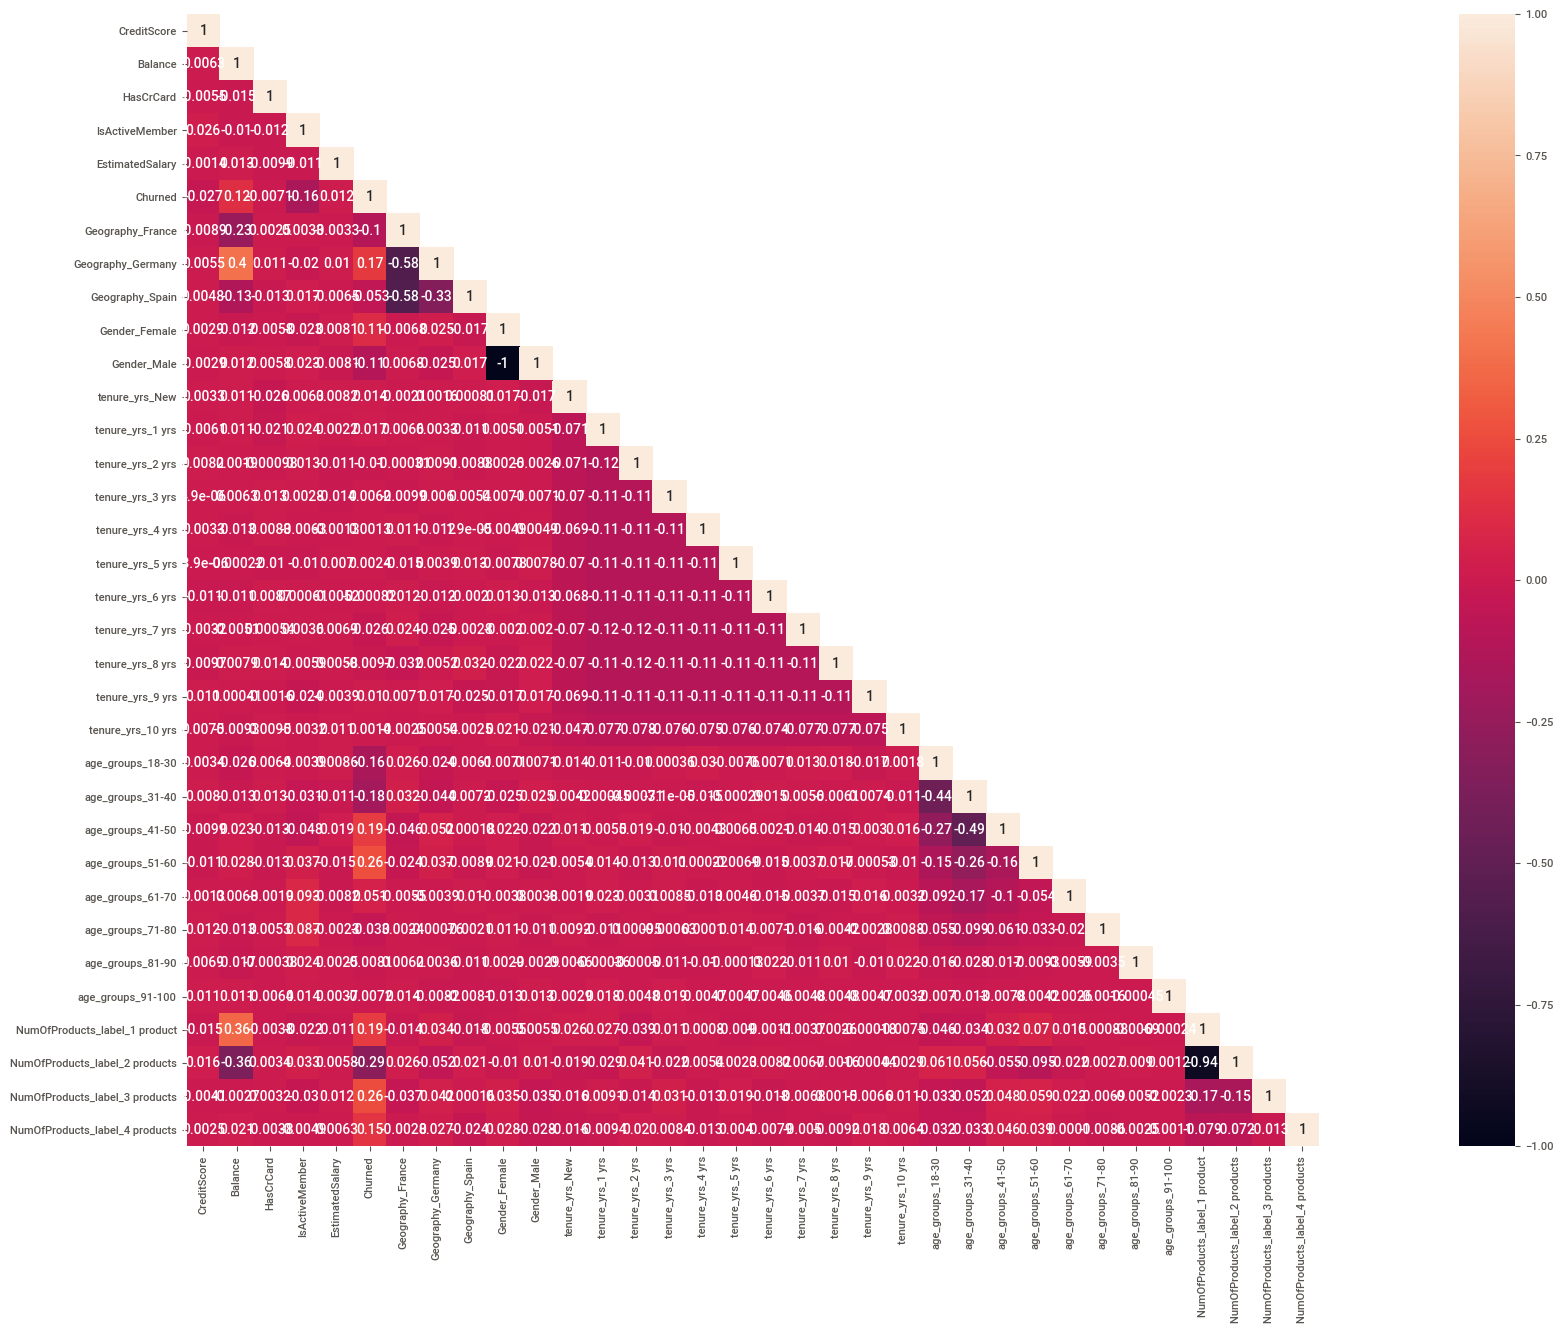

In [ ]:
corrMatrix = churn_encoded.corr()

mask = np.array(corrMatrix)
mask[np.tril_indices_from(mask)] = False #to make correlation matrix a triangle
fig, ax = plt.subplots()
fig.set_size_inches(36,15)
sns.heatmap(corrMatrix, mask = mask, square = True, annot = True)

NumOfProducts_label_2 products and Gender_male will be dropped due to multi-collinearity

In [ ]:
churn_ML = churn_encoded.drop(['NumOfProducts_label_2 products', 'Gender_Male'], axis = 1)
churn_ML 

,CreditScore,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,tenure_yrs_New,tenure_yrs_1 yrs,tenure_yrs_2 yrs,tenure_yrs_3 yrs,tenure_yrs_4 yrs,tenure_yrs_5 yrs,tenure_yrs_6 yrs,tenure_yrs_7 yrs,tenure_yrs_8 yrs,tenure_yrs_9 yrs,tenure_yrs_10 yrs,age_groups_18-30,age_groups_31-40,age_groups_41-50,age_groups_51-60,age_groups_61-70,age_groups_71-80,age_groups_81-90,age_groups_91-100,NumOfProducts_label_1 product,NumOfProducts_label_3 products,NumOfProducts_label_4 products
0,619,0.00,1,1,101348.88,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,608,83807.86,0,1,112542.58,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,502,159660.80,1,0,113931.57,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
3,699,0.00,0,0,93826.63,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,850,125510.82,1,1,79084.10,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0.00,1,0,96270.64,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9996,516,57369.61,1,1,101699.77,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
9997,709,0.00,0,1,42085.58,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
9998,772,75075.31,1,0,92888.52,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


### Split the data into train and test sets

In [ ]:
X = churn_ML.drop(['Churned'], axis = 1)
y = churn_ML['Churned']

# Split train: test data into 70:30 ratio
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3, random_state = 42)

### Scaling

In [ ]:
# Scaling to between 0 to 1 to ensure that no feature will be given extra weights during training. 

min_max_scaler = preprocessing.MinMaxScaler()

X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

### Oversampling using SMOTE
SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them (synthesises new minority instances between existing minority instances).

In [ ]:
print(f'Distribution of class labels before resampling {Counter(y_train)}')

Distribution of class labels before resampling Counter({0: 5547, 1: 1453})


In [ ]:
os = SMOTE(random_state = 1)
X_train, y_train = os.fit_sample(X_train, y_train)

print(f'Distribution of class labels after resampling {Counter(y_train)}')

Distribution of class labels after resampling Counter({1: 5547, 0: 5547})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


### Classification Modelling

XGBClassifer
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      2416
           1       0.59      0.66      0.62       584

    accuracy                           0.84      3000
   macro avg       0.75      0.77      0.76      3000
weighted avg       0.85      0.84      0.85      3000



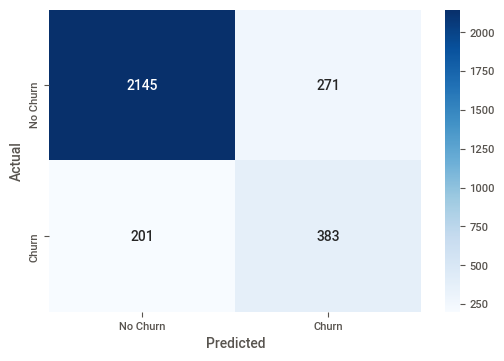

RandomForestClassifier
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      2416
           1       0.59      0.52      0.56       584

    accuracy                           0.84      3000
   macro avg       0.74      0.72      0.73      3000
weighted avg       0.83      0.84      0.83      3000



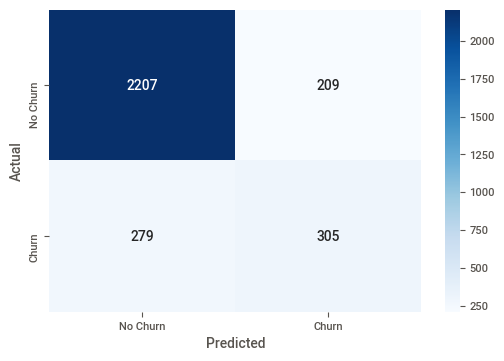

AdaBoostClassifier
              precision    recall  f1-score   support

           0       0.91      0.83      0.87      2416
           1       0.50      0.67      0.57       584

    accuracy                           0.80      3000
   macro avg       0.70      0.75      0.72      3000
weighted avg       0.83      0.80      0.81      3000



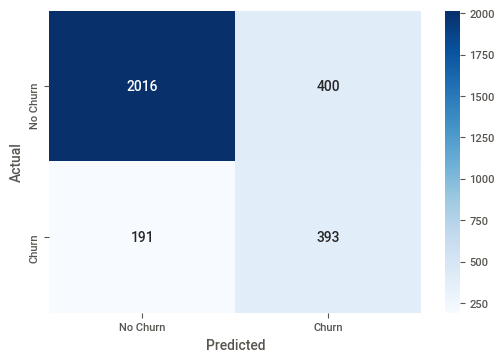

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression
              precision    recall  f1-score   support

           0       0.93      0.79      0.85      2416
           1       0.46      0.75      0.57       584

    accuracy                           0.78      3000
   macro avg       0.70      0.77      0.71      3000
weighted avg       0.84      0.78      0.80      3000



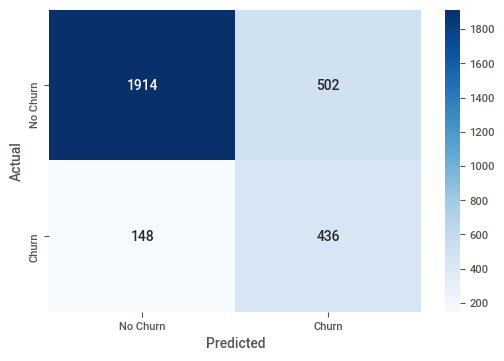

,Model,Train Accuracy,Test Accuracy,Recall,ROC AUC Score
0,XGBClassifer,0.864882,0.842667,0.655822,0.771827
1,RandomForestClassifier,1.000000,0.837333,0.522260,0.717877
2,AdaBoostClassifier,0.840004,0.803000,0.672945,0.753691
3,LogisticRegression,0.778980,0.783333,0.746575,0.769397


In [ ]:
models = [xgb.XGBClassifier(random_state=42), 
          RandomForestClassifier(random_state=42), ensemble.AdaBoostClassifier(random_state=42), 
          LogisticRegression()]

model_names = ['XGBClassifer','RandomForestClassifier', 'AdaBoostClassifier','LogisticRegression']

train_accuracy = []
test_accuracy = []
test_recall = []
roc_auc = []

dict_container = {}  # for pd.DataFrame

for model in range(len(models)):
    classifier = models[model]
    classifier_name = model_names[model]
    classifier.fit(X_train, y_train)
    train_pred = classifier.predict(X_train)
    class_pred = classifier.predict(X_test)
    train_accuracy.append(accuracy_score(y_train, train_pred)) # Train accuracy (to track overfitting)
    test_accuracy.append(accuracy_score(y_test, class_pred))   # Test accuracy
    test_recall.append(recall_score(y_test, class_pred)) # Test recall
    print(classifier_name)
    print(metrics.classification_report(y_test, class_pred))
    cf_matrix = metrics.confusion_matrix(y_test, class_pred)  # Confusion Matrix
    y_true = ["No Churn", "Churn"]
    cf = pd.DataFrame(cf_matrix, columns = y_true, index = y_true)  # create labels for CF
    cf.index.name = 'Actual'
    cf.columns.name = 'Predicted' 
    sns.heatmap(cf, annot=True, cmap='Blues', fmt='g') # fmt='g' suppresses scientific notions
    plt.show()
    roc_auc.append(roc_auc_score(y_test, class_pred)) 
    
dict_container = {'Model': model_names, 'Train Accuracy': train_accuracy, 
                  'Test Accuracy': test_accuracy, 'Recall': test_recall, 'ROC AUC Score': roc_auc}

score_df = pd.DataFrame(dict_container)
score_df

Our metric should be Recall or F2 score, to reduce the False Negatives - If the goal is to engage and talk to the customers to prevent them from churning, it's okay to engage with those who are mistakenly tagged as 'not churned,' as it does not cause any negative problem. It could potentially make them even happier for the extra love they are getting.

Based on the recall score, the Logistic Regression model will be chosen.

### Hyper-parameter tuning/regularisation

Hyperparameter tuning optimizes a single target variable. Hyperparameters are manually adjusted to fit the models better.

In [ ]:
# Using recall scores for hyperparameter tuning to ensure that the accuracy of predicting whether the customer Churn
recall_scorer = metrics.make_scorer(metrics.recall_score)

parameters = {'solver' : ['sag', 'newton-cg', 'lbfgs', 'liblinear'], 'C' : [0.01, 0.05, 0.1, 0.2, 0.5]}

rs_lr = model_selection.RandomizedSearchCV(LogisticRegression(penalty = 'l2', class_weight = 'balanced', random_state = 42), param_distributions = parameters, scoring = recall_scorer, cv = model_selection.StratifiedKFold(n_splits = 5, shuffle = True, random_state = 2019), verbose = 2, n_jobs = -1)

rs_lr.fit(X_train, y_train)

# Show the parameters of hypertuned model
rs_lr.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.4s finished


LogisticRegression(C=0.5, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

              precision    recall  f1-score   support

           0       0.93      0.79      0.85      2416
           1       0.46      0.75      0.57       584

    accuracy                           0.78      3000
   macro avg       0.70      0.77      0.71      3000
weighted avg       0.84      0.78      0.80      3000



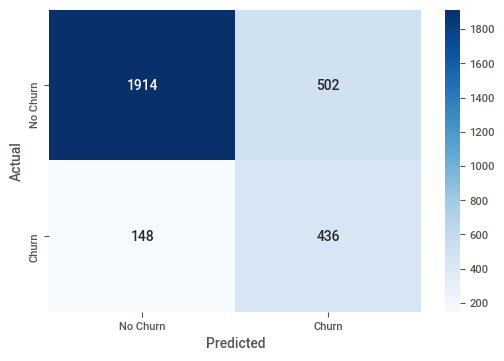

In [ ]:
lr = LogisticRegression(C = 0.5, class_weight = 'balanced', random_state=1, solver = 'liblinear')

lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

print(metrics.classification_report(y_test, class_pred))

cf_matrix = metrics.confusion_matrix(y_test, class_pred)
y_true = ["No Churn", "Churn"]
cf = pd.DataFrame(cf_matrix, columns = y_true, index = y_true)
cf.index.name = 'Actual'
cf.columns.name = 'Predicted'
sns.heatmap(cf, annot=True, cmap='Blues', fmt='g')
plt.show()

In [ ]:
436/(436+148) #recall score not much improvement

0.7465753424657534

In [ ]:
lr_importance= pd.DataFrame.from_dict({'feature':list(X.columns), 'importance': lr.coef_[0]})
print(lr_importance.sort_values('importance',ascending=True).head(10))
print('-'*50)
print(lr_importance.sort_values('importance',ascending=False).head(10))


              feature  importance
20   age_groups_18-30   -1.395487
25   age_groups_71-80   -1.139414
3      IsActiveMember   -0.973647
21   age_groups_31-40   -0.571078
5    Geography_France   -0.519485
0         CreditScore   -0.480424
7     Geography_Spain   -0.378580
19  tenure_yrs_10 yrs   -0.271177
26   age_groups_81-90   -0.261010
1             Balance   -0.197424
--------------------------------------------------
                           feature  importance
30  NumOfProducts_label_4 products    4.597365
29  NumOfProducts_label_3 products    4.241481
23                age_groups_51-60    1.657874
28   NumOfProducts_label_1 product    1.614389
24                age_groups_61-70    0.746599
22                age_groups_41-50    0.636288
8                    Gender_Female    0.634772
6                Geography_Germany    0.436907
9                   tenure_yrs_New    0.199266
15                tenure_yrs_6 yrs    0.078093


### **Analysis of supervised learning results**

The features that are most important to predict whether the customers churn is the number of products that the customers bought from the bank, in particular, those customers that bought 3 and 4 products. Additionally, the customers between the age of 51 to 60 years old are also important for the prediction of customer churn (*top 3 importance*).

With the understanding of the important features that affected the customer churn in this bank, we will move on to the un-supervised learning, where we will identify the characteristics of the group that is more likely to churn.

# **Un-supervised learning**

### Transform the data

Encoded data from the previous supervised learning section will be transformed using the Min-max scaler method



In [ ]:
# Scaling to between 0 to 1 to ensure that no feature will be given extra weights during training. 
min_max_scaler = preprocessing.MinMaxScaler()
churn_minmax = min_max_scaler.fit_transform(churn_encoded)

In [ ]:
pd.DataFrame(churn_minmax) 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
0,0.538,0.000000,1.0,1.0,0.506735,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.516,0.334031,0.0,1.0,0.562709,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.304,0.636357,1.0,0.0,0.569654,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.698,0.000000,0.0,0.0,0.469120,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.000,0.500246,1.0,1.0,0.395400,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.000000,1.0,0.0,0.481341,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9996,0.332,0.228657,1.0,1.0,0.508490,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9997,0.718,0.000000,0.0,1.0,0.210390,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9998,0.844,0.299226,1.0,0.0,0.464429,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Elbow plots

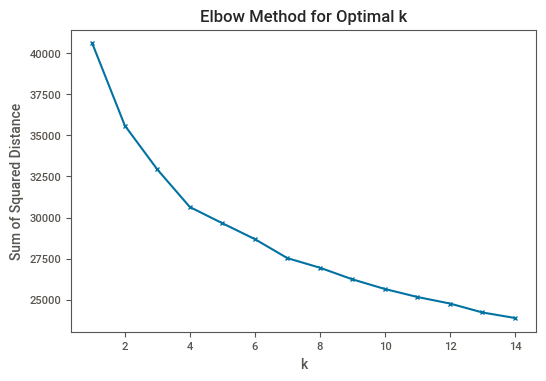

In [ ]:
# Ploting Elbow curve to determine the number of clusters required for the K-means clustering
Sum_of_squared_dists = []
for k in range (1,15):
  km = KMeans(n_clusters = k, random_state = 42).fit(churn_minmax)
  Sum_of_squared_dists.append(km.inertia_)

plt.plot(range(1,15), Sum_of_squared_dists, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distance')
plt.title('Elbow Method for Optimal k')
plt.show()

### Applying Silhouette Coefficient
Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

1: Means clusters are well apart from each other and clearly distinguished.

0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way.

To determine the number of clusters, we will take the **highest sihouette score where the clusters do not intersect with one another (for kmeans clustering)**.

In [ ]:
n_clusters = range(2,15)

for k in n_clusters:
  clusterer = KMeans(n_clusters = k, random_state = 42)
  preds = clusterer.fit_predict(churn_minmax)
  avg_score = silhouette_score(churn_minmax,preds)
  print(f'For n clusters = {k}, silhouette score is {avg_score}')

For n clusters = 2, silhouette score is 0.1219944035861163
For n clusters = 3, silhouette score is 0.11234049423735637
For n clusters = 4, silhouette score is 0.1270824951305491
For n clusters = 5, silhouette score is 0.1064635386701999
For n clusters = 6, silhouette score is 0.11917351862796972
For n clusters = 7, silhouette score is 0.11548711942222532
For n clusters = 8, silhouette score is 0.11818498004729389
For n clusters = 9, silhouette score is 0.12271233907062323
For n clusters = 10, silhouette score is 0.12333672247828867
For n clusters = 11, silhouette score is 0.11043911831291157
For n clusters = 12, silhouette score is 0.10473542111258591
For n clusters = 13, silhouette score is 0.11639668497944468
For n clusters = 14, silhouette score is 0.11663286752567845


**A cluster of 4 will be chosen**

### Kmeans Clustering
Kmeans algorithm is an iterative algorithm that tries to partition the dataset into *K*pre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. 

It tries to make the intra-cluster data points as similar as possible while also keeping the clusters as different (far) as possible

In [ ]:
cluster_number1 = 4
kmeans = KMeans(n_clusters = cluster_number1, random_state = 42).fit(churn_minmax)
churn_encoded['kmeans1'] = kmeans.labels_ #create column kmeans1 to the original dataframe

print(churn_encoded)

      CreditScore    Balance  ...  NumOfProducts_label_4 products  kmeans1
0             619       0.00  ...                               0        0
1             608   83807.86  ...                               0        0
2             502  159660.80  ...                               0        0
3             699       0.00  ...                               0        2
4             850  125510.82  ...                               0        0
...           ...        ...  ...                             ...      ...
9995          771       0.00  ...                               0        3
9996          516   57369.61  ...                               0        1
9997          709       0.00  ...                               0        0
9998          772   75075.31  ...                               0        3
9999          792  130142.79  ...                               0        0

[10000 rows x 35 columns]


In [ ]:
# Check counts of each clusters in 'kmeans1'
counts1 = churn_encoded['kmeans1'].value_counts()

print(counts1)

1    2908
3    2549
0    2471
2    2072
Name: kmeans1, dtype: int64


In [ ]:
# Visualisation of the clusters
model1 = KMeans(cluster_number1, random_state = 42)

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


InterclusterDistance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7efd1d3d8780>,
                     embedding='mds', legend=True, legend_loc='lower left',
                     legend_size=1.5, max_size=25000, min_size=400, model=None,
                     random_state=None, scoring='membership')

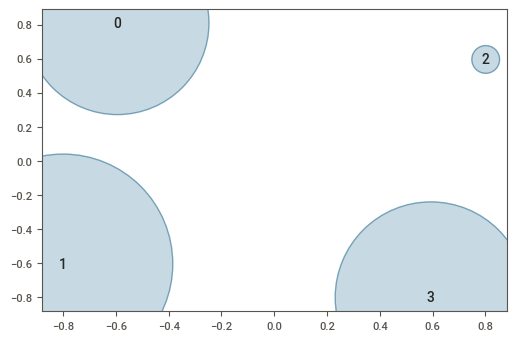

In [ ]:
# Clusters using min max transformation
visualizer = InterclusterDistance(model1)
visualizer.fit(churn_minmax)

In [ ]:
# Groupby kmeans1, to take all rows and columns up to 'Churned', and to take the mean of all values under each cluster
req_col = len(churn_encoded.columns)-1
kmeans_mean1 = churn_encoded.groupby(['kmeans1'])[churn_encoded.iloc[:,:req_col].columns].mean()

kmeans_mean1

### **Interpretation of the data**

To make sense of the clusters obtained, average (based on original churn data) will be done for each variables to allow some comparion to be made.

From the above summary generated, we will be focusing on two clusters with the highest churn. Based on the previous supervised learning method, we know that the customers in the age group 51-60 and have 3 or 4 products are influential to churn. Moreover, these characteristics are also higher than the average, which suggest that these people are more likely to churn. This focuses the target group instead of targetting the whole cluster.

A possible suggestion is to have a focus group amongst people with these characteristics and understand their behaviour/reasons for churn.

In [ ]:
avg = churn_encoded.iloc[:,:req_col].mean()
kmeans_mean1['Average'] = avg
kmeans_mean1 = kmeans_mean1.transpose()

kmeans_mean1